In [2]:
!pip install plotnine

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In [97]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline

In [136]:
#1. Read the dataset


In [98]:
data = pd.read_csv("C:/Users/somay/OneDrive/Desktop/iti_labs/machine_learning_2/suicide homicide gdp.csv")
data

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          13566 non-null  object 
 1   iso3c                                            13464 non-null  object 
 2   iso2c                                            13413 non-null  object 
 3   year                                             13566 non-null  int64  
 4   Intentional homicides (per 100,000 people)       3840 non-null   float64
 5   Suicide mortality rate (per 100,000 population)  4620 non-null   float64
 6   GDP (current US$)                                11396 non-null  float64
 7   GDP per capita, PPP (current international $)    7238 non-null   float64
 8   adminregion                                      6987 non-null   object 
 9   incomeLevel                 

In [137]:
#Data preprocessing

In [100]:
df = data
df.dropna(subset=['Intentional homicides (per 100,000 people)'], inplace=True)


In [101]:
df

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
39,Afghanistan,AFG,AF,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
40,Afghanistan,AFG,AF,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
41,Afghanistan,AFG,AF,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
42,Afghanistan,AFG,AF,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
45,Afghanistan,AFG,AF,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13549,Zimbabwe,ZWE,ZW,2004,11.281282,14.2,5.805598e+09,1762.520649,Sub-Saharan Africa (excluding high income),Lower middle income
13550,Zimbabwe,ZWE,ZW,2005,11.178553,14.0,5.755215e+09,1705.569979,Sub-Saharan Africa (excluding high income),Lower middle income
13551,Zimbabwe,ZWE,ZW,2006,8.819056,14.4,5.443896e+09,1685.362389,Sub-Saharan Africa (excluding high income),Lower middle income
13555,Zimbabwe,ZWE,ZW,2010,5.599427,21.5,1.204166e+10,1830.827333,Sub-Saharan Africa (excluding high income),Lower middle income


In [102]:
df.isna().sum()

country                                               0
iso3c                                                 6
iso2c                                                20
year                                                  0
Intentional homicides (per 100,000 people)            0
Suicide mortality rate (per 100,000 population)    1332
GDP (current US$)                                   127
GDP per capita, PPP (current international $)       297
adminregion                                        1825
incomeLevel                                           6
dtype: int64

In [103]:
nulls = round(data.isnull().sum(axis=0)*100/data.shape[0],2)
nulls.sort_values(ascending = False)

adminregion                                        47.53
Suicide mortality rate (per 100,000 population)    34.69
GDP per capita, PPP (current international $)       7.73
GDP (current US$)                                   3.31
iso2c                                               0.52
iso3c                                               0.16
incomeLevel                                         0.16
country                                             0.00
year                                                0.00
Intentional homicides (per 100,000 people)          0.00
dtype: float64

In [104]:
df.describe()

,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
count,3840.000000,3840.000000,2508.000000,3.713000e+03,3543.000000
mean,2005.267188,8.044086,11.434514,8.155237e+11,18340.026220
std,7.832179,12.180537,9.310289,4.076101e+12,19263.166732
min,1990.000000,0.000000,0.000000,1.545099e+07,400.273999
25%,1999.000000,1.356422,5.200000,6.098093e+09,5178.239999
50%,2006.000000,3.408601,8.903867,3.465714e+10,11620.915900
75%,2012.000000,9.247258,14.500000,2.347817e+11,25674.467583
max,2018.000000,141.722580,92.400000,7.955766e+13,153563.910960


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Intentional homicides (per 100,000 people)'}>],
       [<AxesSubplot:title={'center':'Suicide mortality rate (per 100,000 population)'}>,
        <AxesSubplot:title={'center':'GDP (current US$)'}>],
       [<AxesSubplot:title={'center':'GDP per capita, PPP (current international $)'}>,
        <AxesSubplot:>]], dtype=object)

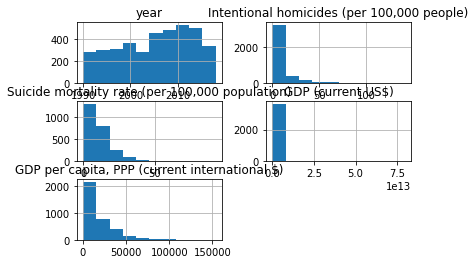

In [105]:
df.hist()

In [107]:
df['country'].unique()


array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia

In [12]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [13]:
df

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
39,0,AFG,AF,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
40,0,AFG,AF,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
41,0,AFG,AF,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
42,0,AFG,AF,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
45,0,AFG,AF,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13549,239,ZWE,ZW,2004,11.281282,14.2,5.805598e+09,1762.520649,Sub-Saharan Africa (excluding high income),Lower middle income
13550,239,ZWE,ZW,2005,11.178553,14.0,5.755215e+09,1705.569979,Sub-Saharan Africa (excluding high income),Lower middle income
13551,239,ZWE,ZW,2006,8.819056,14.4,5.443896e+09,1685.362389,Sub-Saharan Africa (excluding high income),Lower middle income
13555,239,ZWE,ZW,2010,5.599427,21.5,1.204166e+10,1830.827333,Sub-Saharan Africa (excluding high income),Lower middle income


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3840 entries, 39 to 13557
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          3840 non-null   int32  
 1   iso3c                                            3834 non-null   object 
 2   iso2c                                            3820 non-null   object 
 3   year                                             3840 non-null   int64  
 4   Intentional homicides (per 100,000 people)       3840 non-null   float64
 5   Suicide mortality rate (per 100,000 population)  2508 non-null   float64
 6   GDP (current US$)                                3713 non-null   float64
 7   GDP per capita, PPP (current international $)    3543 non-null   float64
 8   adminregion                                      2015 non-null   object 
 9   incomeLevel                 

In [15]:
le = LabelEncoder()

df['adminregion'] = le.fit_transform(df['adminregion'])
df['incomeLevel'] = le.fit_transform(df['incomeLevel'])
df.drop(['iso3c','iso2c'], axis=1, inplace=True)


In [16]:
df = df.fillna(df.mean())
# for c in df_copy.columns[1:]:
#     df_copy = df_copy.fillna({c: df_copy[c].value_counts().max()})

In [17]:
df.isna().sum()

country                                            0
year                                               0
Intentional homicides (per 100,000 people)         0
Suicide mortality rate (per 100,000 population)    0
GDP (current US$)                                  0
GDP per capita, PPP (current international $)      0
adminregion                                        0
incomeLevel                                        0
dtype: int64

In [18]:
df

,country,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
39,0,2009,3.926774,4.4,1.241616e+10,1519.692923,4,2
40,0,2010,3.368110,4.3,1.585668e+10,1710.575411,4,2
41,0,2011,4.087337,4.1,1.780511e+10,1699.488110,4,2
42,0,2012,6.251328,4.0,1.990732e+10,1914.774228,4,2
45,0,2015,9.783922,4.0,1.913421e+10,2087.305323,4,2
...,...,...,...,...,...,...,...,...
13549,239,2004,11.281282,14.2,5.805598e+09,1762.520649,5,3
13550,239,2005,11.178553,14.0,5.755215e+09,1705.569979,5,3
13551,239,2006,8.819056,14.4,5.443896e+09,1685.362389,5,3
13555,239,2010,5.599427,21.5,1.204166e+10,1830.827333,5,3


In [138]:
#Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
df_final = df
col = df.columns
features = df[col]
df_final[col] = MinMaxScaler().fit_transform(df_final.values)
df_final.head()

,country,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
39,0.0,0.678571,0.027707,0.047619,0.000156,0.007309,0.666667,0.333333
40,0.0,0.714286,0.023766,0.046537,0.000199,0.008555,0.666667,0.333333
41,0.0,0.750000,0.028840,0.044372,0.000224,0.008483,0.666667,0.333333
42,0.0,0.785714,0.044110,0.043290,0.000250,0.009888,0.666667,0.333333
45,0.0,0.892857,0.069036,0.043290,0.000240,0.011015,0.666667,0.333333


In [139]:
#PCA

In [27]:
print(df_final.corr())

                                                  country      year  \
country                                          1.000000 -0.018758   
year                                            -0.018758  1.000000   
Intentional homicides (per 100,000 people)      -0.004019 -0.025290   
Suicide mortality rate (per 100,000 population)  0.031124 -0.038922   
GDP (current US$)                                0.052894  0.134442   
GDP per capita, PPP (current international $)    0.003610  0.230600   
adminregion                                      0.005376  0.028775   
incomeLevel                                     -0.035823 -0.039380   

                                                 Intentional homicides (per 100,000 people)  \
country                                                                           -0.004019   
year                                                                              -0.025290   
Intentional homicides (per 100,000 people)                                 

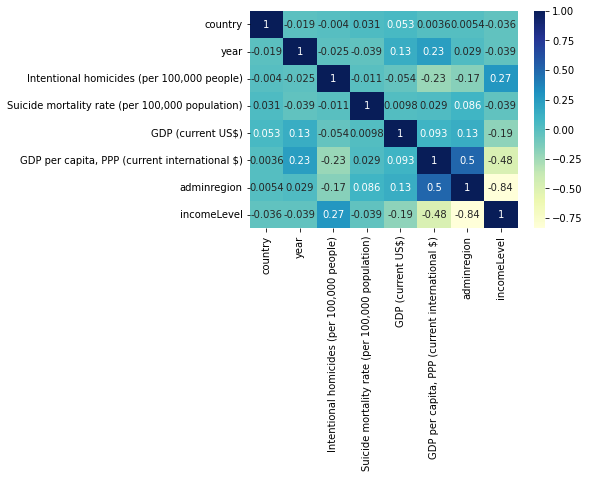

In [29]:
import seaborn as sb
dataplot = sb.heatmap(df_final.corr(), cmap="YlGnBu", annot=True)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_final)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2' ,'principal component 3' ])

In [46]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-0.039175,-0.504379,-0.020333
1,-0.040949,-0.511551,-0.055238
2,-0.042130,-0.518698,-0.089981
3,-0.043093,-0.525856,-0.124795
4,-0.046488,-0.547247,-0.229018
...,...,...,...
3835,-0.081598,0.504930,-0.038208
3836,-0.082986,0.497785,-0.072954
3837,-0.085182,0.490689,-0.107733
3838,-0.093032,0.462952,-0.246044


In [95]:
print(principalDf.corr())

                       principal component 1  principal component 2  \
principal component 1           1.000000e+00          -9.806021e-17   
principal component 2          -9.806021e-17           1.000000e+00   
principal component 3           6.674755e-16           1.185513e-16   
hac                             2.745670e-01          -5.881616e-01   
km                              3.587547e-01          -6.245941e-01   
gm                             -3.587547e-01           6.245941e-01   
db                             -2.287931e-01           6.535609e-01   

                       principal component 3       hac        km        gm  \
principal component 1           6.674755e-16  0.274567  0.358755 -0.358755   
principal component 2           1.185513e-16 -0.588162 -0.624594  0.624594   
principal component 3           1.000000e+00  0.094978  0.102751 -0.102751   
hac                             9.497776e-02  1.000000  0.951677 -0.951677   
km                              1.027507e

In [140]:
#models

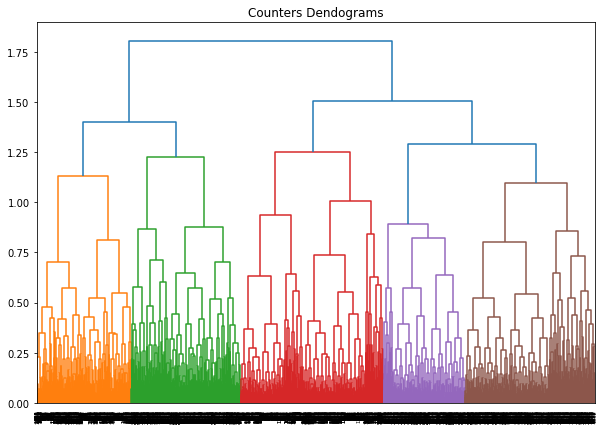

In [47]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=principalDf , method='complete',metric='euclidean'),orientation='top')

In [120]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(5).fit(principalDf)
labels = clustering.labels_

In [121]:
from sklearn import metrics
metrics.silhouette_score(df_final,labels)

0.1276464092930444

In [122]:
datab1 = DBSCAN(eps=0.3, min_samples=10).fit(principalDf)

labl1 = datab1.labels_

In [123]:
from sklearn import metrics
# Number of clusters in labels, ignoring noise if present.
num_clusters_ = len(set(labl1)) - 1
num_noise_ = list(labl1).count(-1)

print("number of clusters: %d" % num_clusters_)
print("number of noise points: %d" % num_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(principalDf, labl1))

number of clusters: 10
number of noise points: 7
Silhouette Coefficient: 0.605


In [124]:

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
db = DBSCAN(eps=0.4, min_samples=10)

hac.fit(principalDf)
km.fit(principalDf)
gm.fit(principalDf)
db.fit(principalDf)


principalDf["hac"] = hac.labels_
principalDf["km"]  = km.labels_
principalDf["gm"]  = gm.predict(principalDf)
principalDf["db"]  = db.labels_


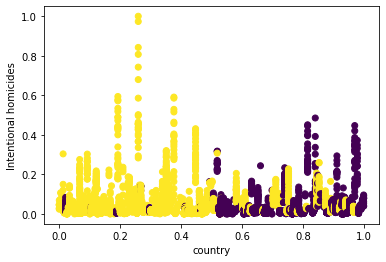

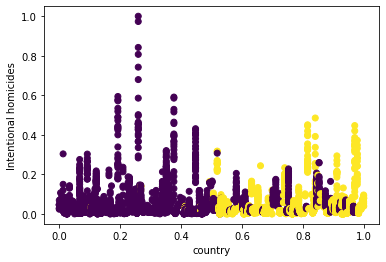

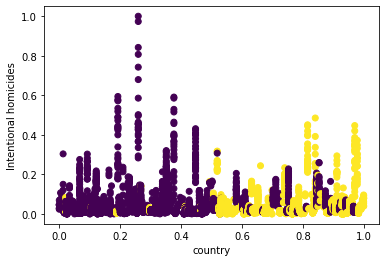

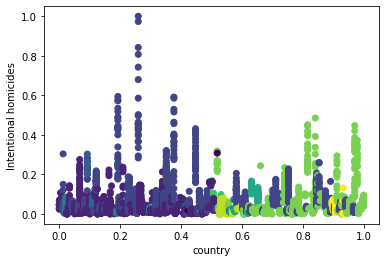

In [133]:
plt.scatter(x = df_final['country'], y = df_final['Intentional homicides (per 100,000 people)'] , c =principalDf["hac"] )
plt.xlabel("country") 
plt.ylabel("Intentional homicides") 
plt.show()
plt.scatter(x = df_final['country'], y = df_final['Intentional homicides (per 100,000 people)'] , c =principalDf["km"] )
plt.xlabel("country") 
plt.ylabel("Intentional homicides") 
plt.show()
plt.scatter(x = df_final['country'], y = df_final['Intentional homicides (per 100,000 people)'] , c =principalDf["gm"] )
plt.xlabel("country") 
plt.ylabel("Intentional homicides") 
plt.show()
plt.scatter(x = df_final['country'], y = df_final['Intentional homicides (per 100,000 people)'] , c =principalDf["db"] )
plt.xlabel("country") 
plt.ylabel("Intentional homicides") 
plt.show()

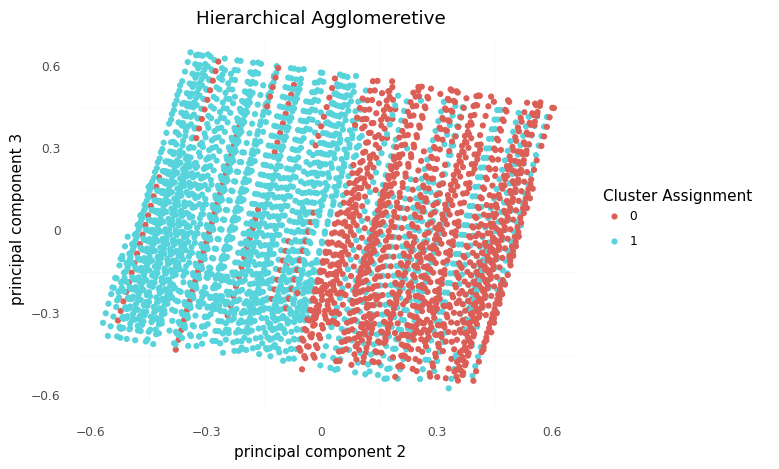

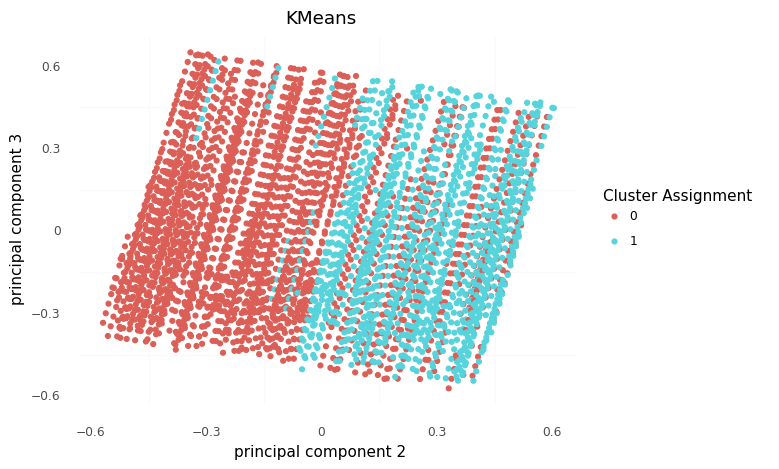

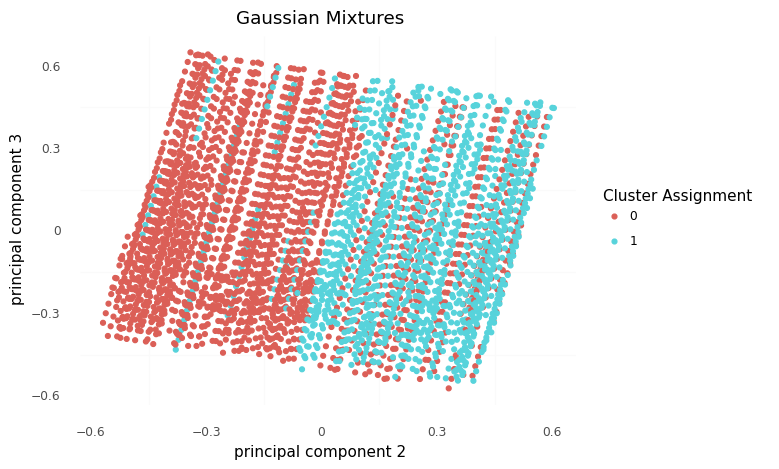

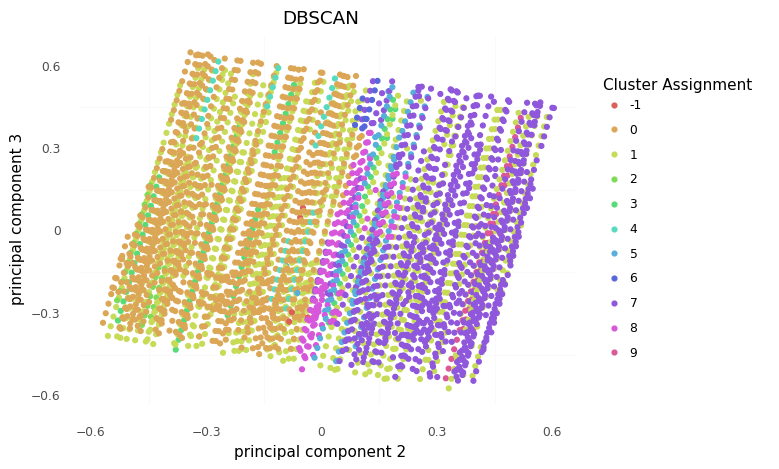

In [125]:
print(ggplot(principalDf, aes(x = 'principal component 2' , y = 'principal component 3',
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(principalDf, aes(x = 'principal component 2', y = 'principal component 3',
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(principalDf, aes(x = 'principal component 2', y = 'principal component 3',
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(principalDf, aes(x = 'principal component 2', y = 'principal component 3',
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))

In [94]:
print("Silhouette Coefficient(Hierarchical Agglomeretive): %0.3f" % metrics.silhouette_score(principalDf, principalDf["hac"]))
print("Silhouette Coefficient(KMeans): %0.3f" % metrics.silhouette_score(principalDf, principalDf["km"]))
print("Silhouette Coefficient(Gaussian Mixtures): %0.3f" % metrics.silhouette_score(principalDf, principalDf["gm"]))
print("Silhouette Coefficient(DBSCAN): %0.3f" % metrics.silhouette_score(principalDf, principalDf["db"]))
#print("Silhouette Coefficient(pca): %0.3f" % metrics.silhouette_score(df, df["principal"]))

Silhouette Coefficient(Hierarchical Agglomeretive): 0.798
Silhouette Coefficient(KMeans): 0.821
Silhouette Coefficient(Gaussian Mixtures): 0.821
Silhouette Coefficient(DBSCAN): 0.605
